In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('D:\\nettech\\MyLearningNotebooks\\MyLearningNotebooks\\datasets\\Classified Data.csv', index_col = 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [13]:
df.shape

(1000, 11)

<AxesSubplot: >

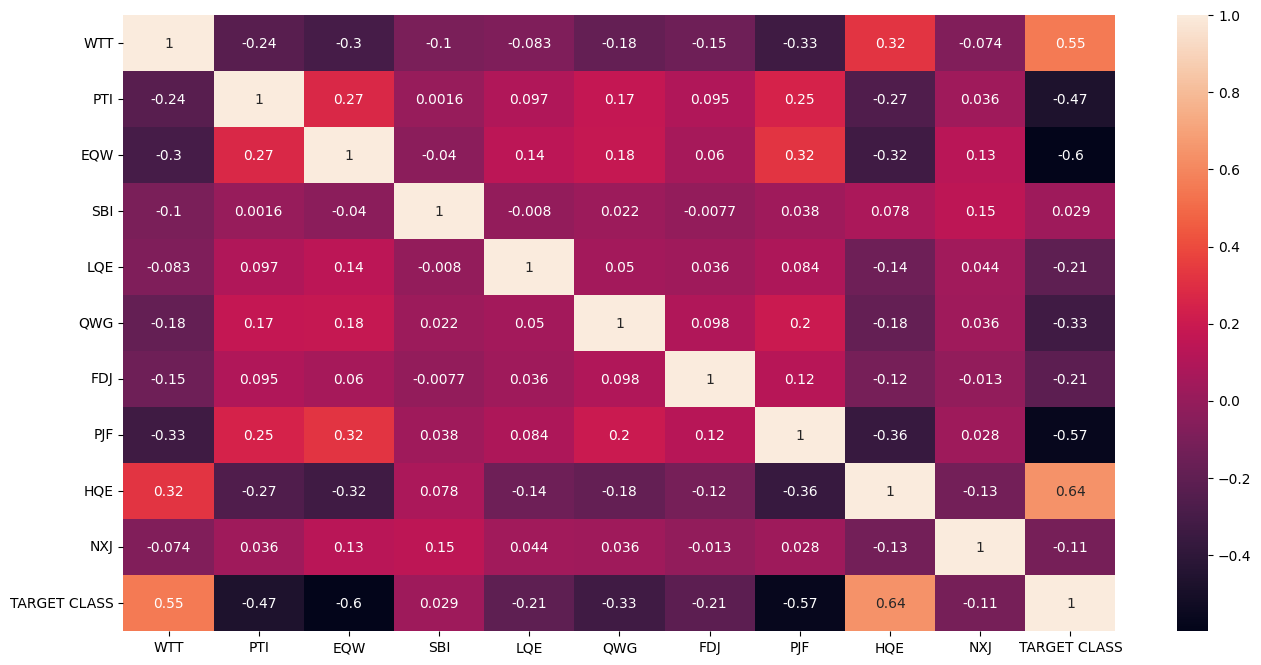

In [12]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot = True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

X = df.iloc[:,:10]
y = df.iloc[:,-1:]

In [28]:
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

scaled_df = pd.DataFrame(scaled_X, columns = X.columns)
scaled_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size= 0.3, random_state = 123)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
errors = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    errors.append(error_rate)

Text(0, 0.5, 'Error Rate')

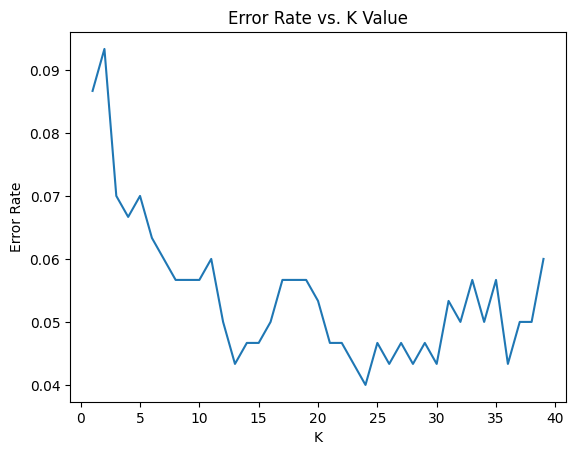

In [45]:
plt.plot(range(1,(len(errors)+1)), errors)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### Optimal K value is observed around 25

In [56]:
knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(X_train, y_train)
y_pred25 = (knn25.predict(X_test))

In [65]:
print(accuracy_score(y_test, y_pred25))

0.9533333333333334


In [66]:
print(classification_report(y_test, y_pred25))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       141
           1       0.94      0.97      0.96       159

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



[[131  10]
 [  4 155]] 



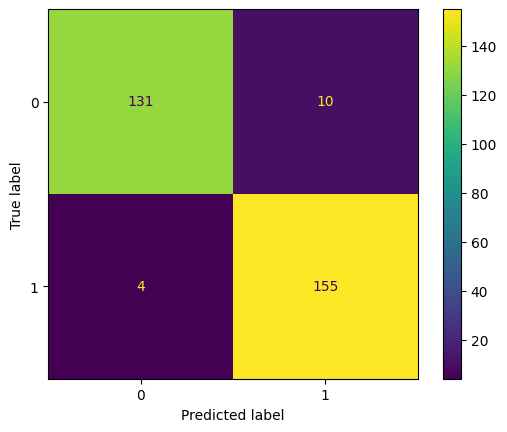

In [67]:
print(confusion_matrix(y_test, y_pred25),'\n')
print(plot_confusion_matrix(knn25, X_test, y_test))